# Single Well Assay with 0.5 uM dialyzed p38, Abl WT, Abl GK, Src WT, and Src GK in non-binding plate; Das, Imat, Pon, Stauro; 3 WVs

### Plot single wv data

In [1]:
# %load single wavelength data


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader


filenames = ['p38_Abl_WT_GK_Src_WT_GK_conc_0_20190320_105744.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_1_20190320_111012.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_2_20190320_112113.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_3_20190320_113213.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_4_20190320_114316.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_5_20190320_115417.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_6_20190320_120518.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_7_20190320_121622.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_8_20190320_122725.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_9_20190320_123832.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_10_20190320_124937.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_11_20190320_130042.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_12_20190320_131149.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_13_20190320_132253.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_14_20190320_133404.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_15_20190320_134512.xml',
             'p38_Abl_WT_GK_Src_WT_GK_conc_16_20190320_135623.xml']

datapath = 'infinite_results'


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])


reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)
    
plate_layout = pd.read_excel('20190307_plate_layout_for_binding_assay.xlsx', header=None)
plate_layout = plate_layout.loc[:, 0:1]
plate_layout.columns = ['well', 'name']
if len(list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')) > 0:
    list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')

# Ex 280/Em 480 nm 

In [2]:
# need to associate reads with correct well
nrows = 8
ncols = 12
index = 0

label = 'ex280_em480_top_gain100'

data_480_20190320 = np.zeros([nrows, ncols, nreads], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements = [(reads[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements = [x if x != 'OVER' else 70000 for x in measurements]
            measurements = [float(i) for i in measurements]
        data_480_20190320[row_index,col_index,:] = np.array(measurements)

## Plot fluorescence at single wv (480 nm)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

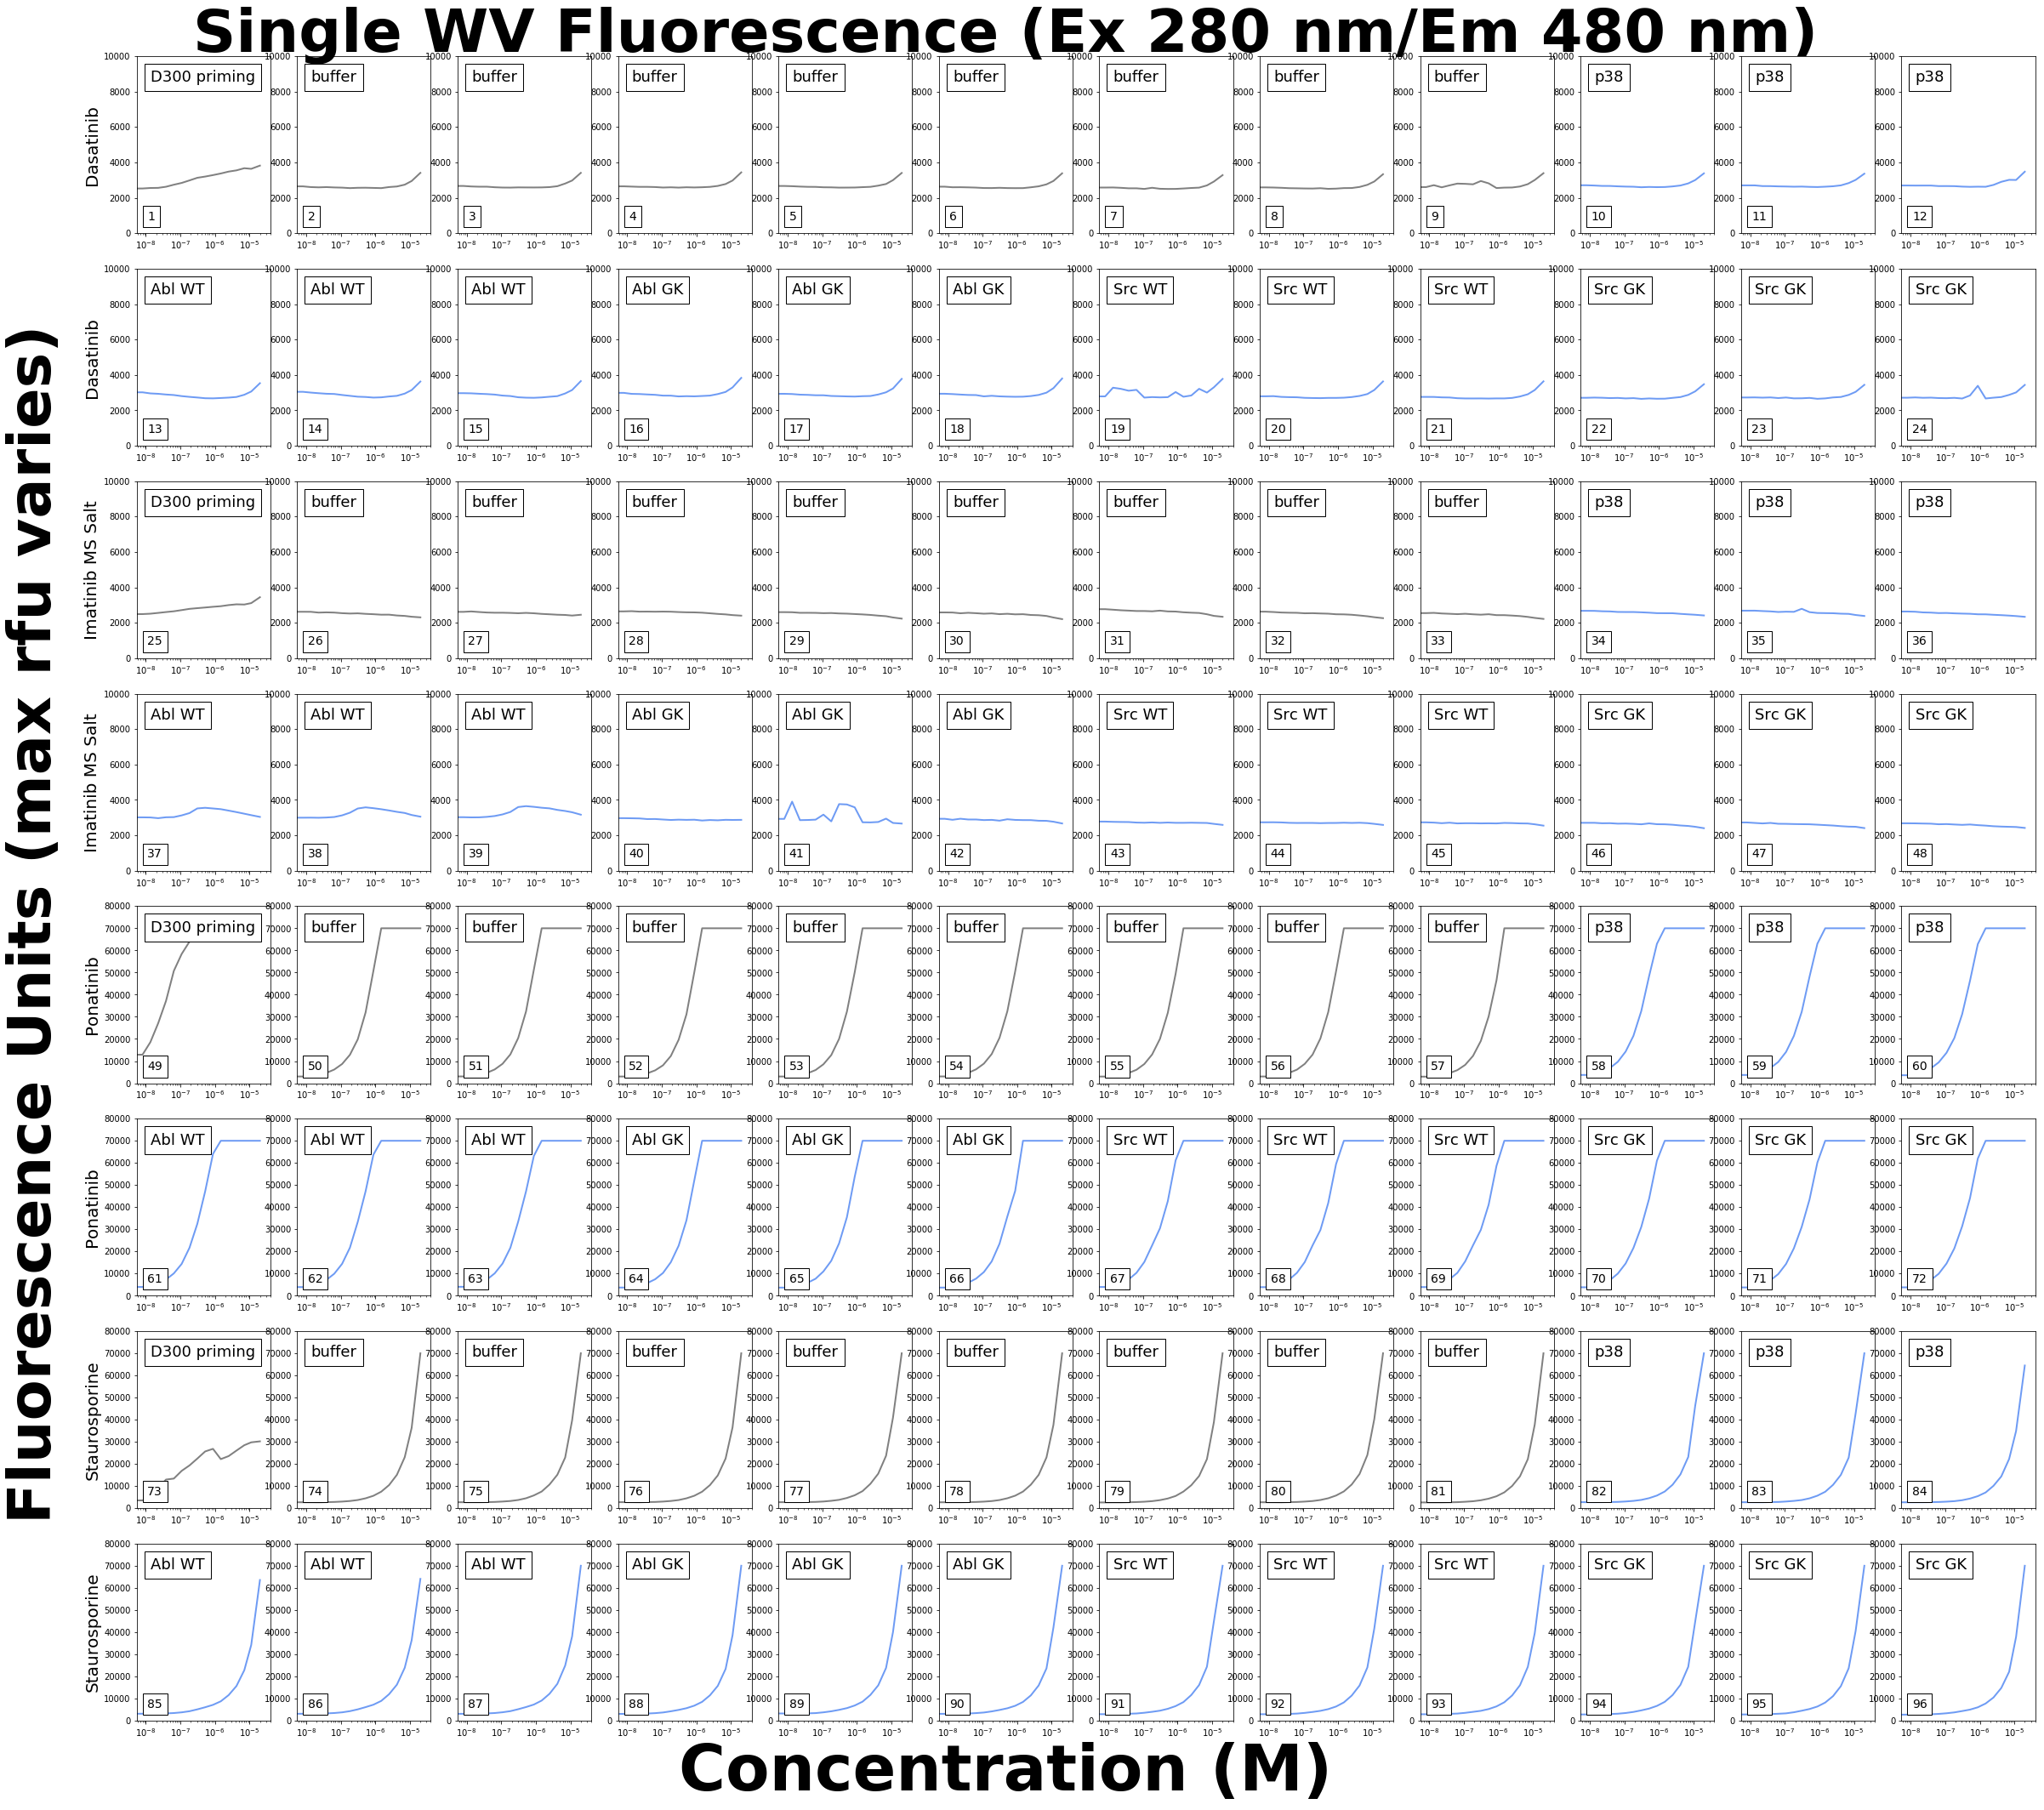

In [3]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Single WV Fluorescence (Ex 280 nm/Em 480 nm)'

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[7]

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_480_20190320[row_index,col_index,:], c=color, linewidth=2);

        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=70, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max rfu varies)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,4.5)

        if index < 48:
            plt.ylim(0,10000)
        else:
            plt.ylim(0,80000)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Dasatinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Imatinib MS Salt', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Ponatinib', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190320_vary_yax_single_well_3_wv_ligs5-8_480_log_y.pdf', bbox_inches='tight', dpi=300)

# Ex 280/Em 420 nm

In [6]:
# need to associate reads with correct well
nrows = 8
ncols = 12
index = 0

label = 'ex280_em420_top_gain100'

data_420_20190320 = np.zeros([nrows, ncols, nreads], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements = [(reads[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements = [x if x != 'OVER' else 70000 for x in measurements]
            measurements = [float(i) for i in measurements]
        data_420_20190320[row_index,col_index,:] = np.array(measurements)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

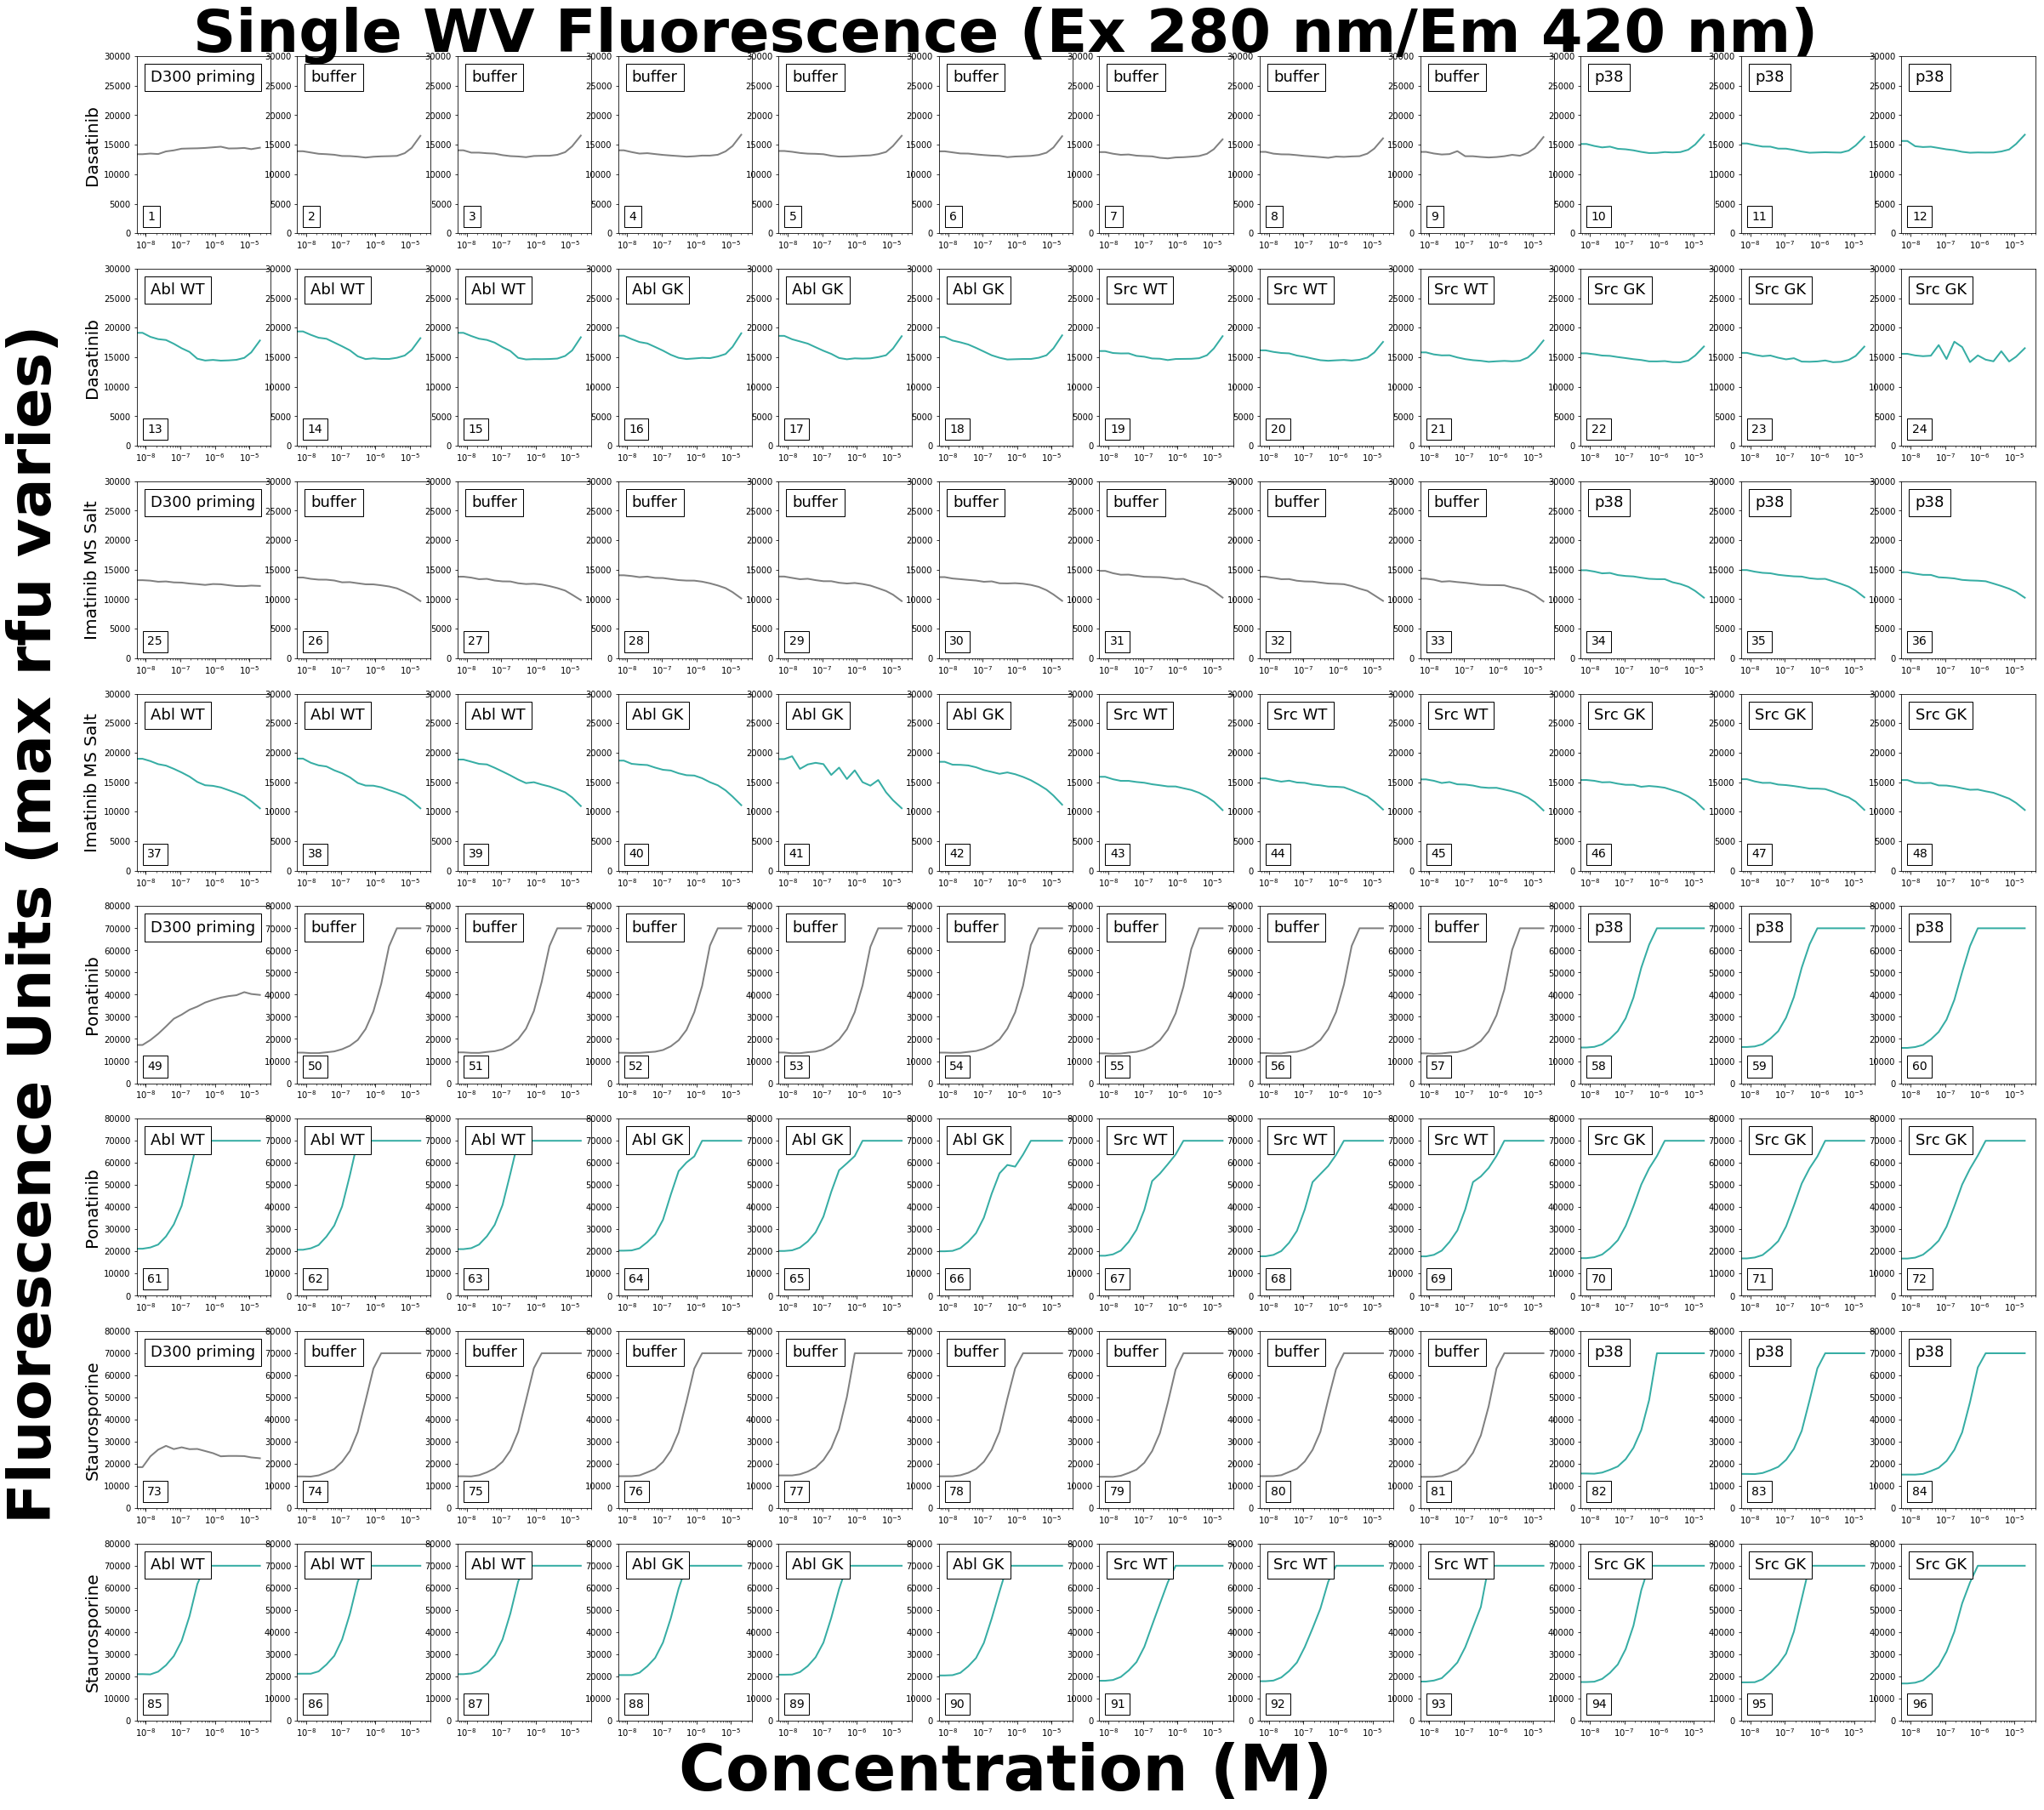

In [7]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Single WV Fluorescence (Ex 280 nm/Em 420 nm)'

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[5]

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_420_20190320[row_index,col_index,:], c=color, linewidth=2);

        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=70, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max rfu varies)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,4.5)

        if index < 48:
            plt.ylim(0,30000)
        else:
            plt.ylim(0,80000)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Dasatinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Imatinib MS Salt', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Ponatinib', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190320_vary_yax_single_well_3_wv_ligs5-8_420_log_y.pdf', bbox_inches='tight', dpi=300)

# Ex 296/Em 396 nm

In [8]:
# need to associate reads with correct well
nrows = 8
ncols = 12
index = 0

label = 'ex296_em396_top_gain100'

data_396_20190320 = np.zeros([nrows, ncols, nreads], np.float64) 
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        measurements = [(reads[i][label][well]) for i in range(nreads)]
        for i in range(nreads):
            measurements = [x if x != 'OVER' else 70000 for x in measurements]
            measurements = [float(i) for i in measurements]
        data_396_20190320[row_index,col_index,:] = np.array(measurements)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

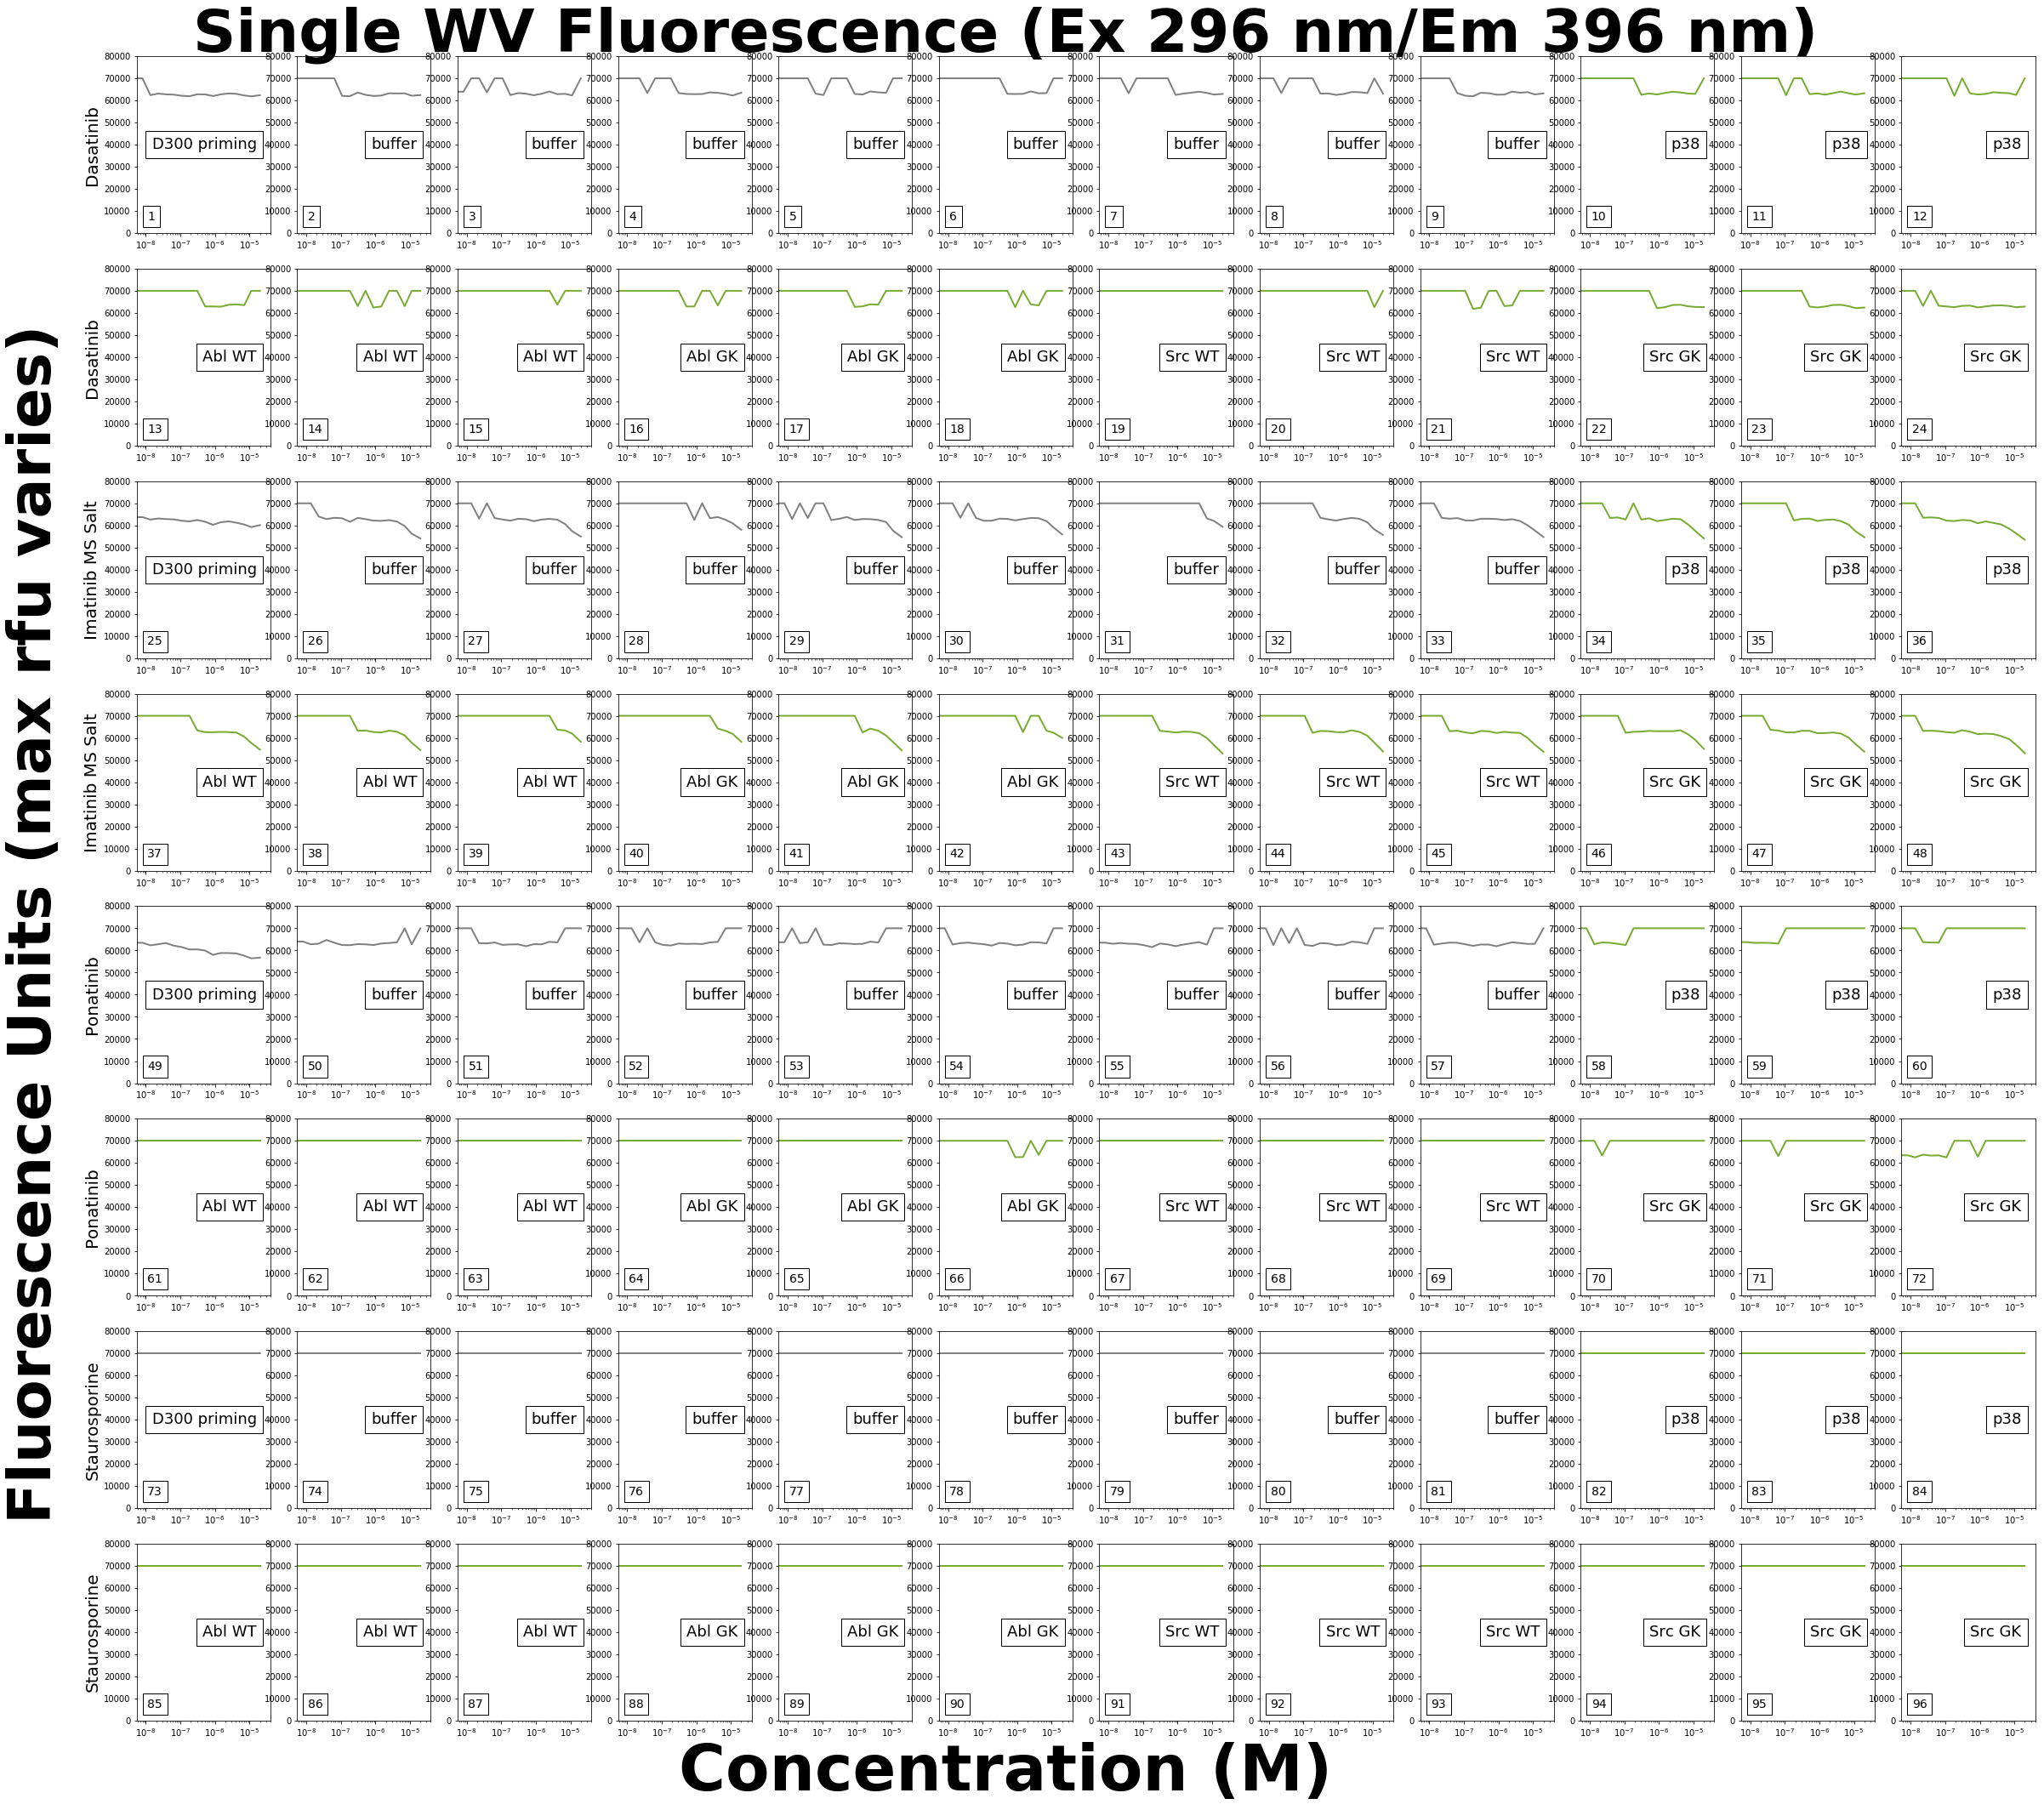

In [9]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Single WV Fluorescence (Ex 296 nm/Em 396 nm)'

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[3]

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_396_20190320[row_index,col_index,:], c=color, linewidth=2);

        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='center right', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=70, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max rfu varies)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,4.5)

        plt.ylim(0,80000)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Dasatinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Imatinib MS Salt', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Ponatinib', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190320_vary_yax_single_well_3_wv_ligs5-8_396_log_y.pdf', bbox_inches='tight', dpi=300)

# Overlap plot of raw traces for 480 nm, 420 nm, and 396 nm

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

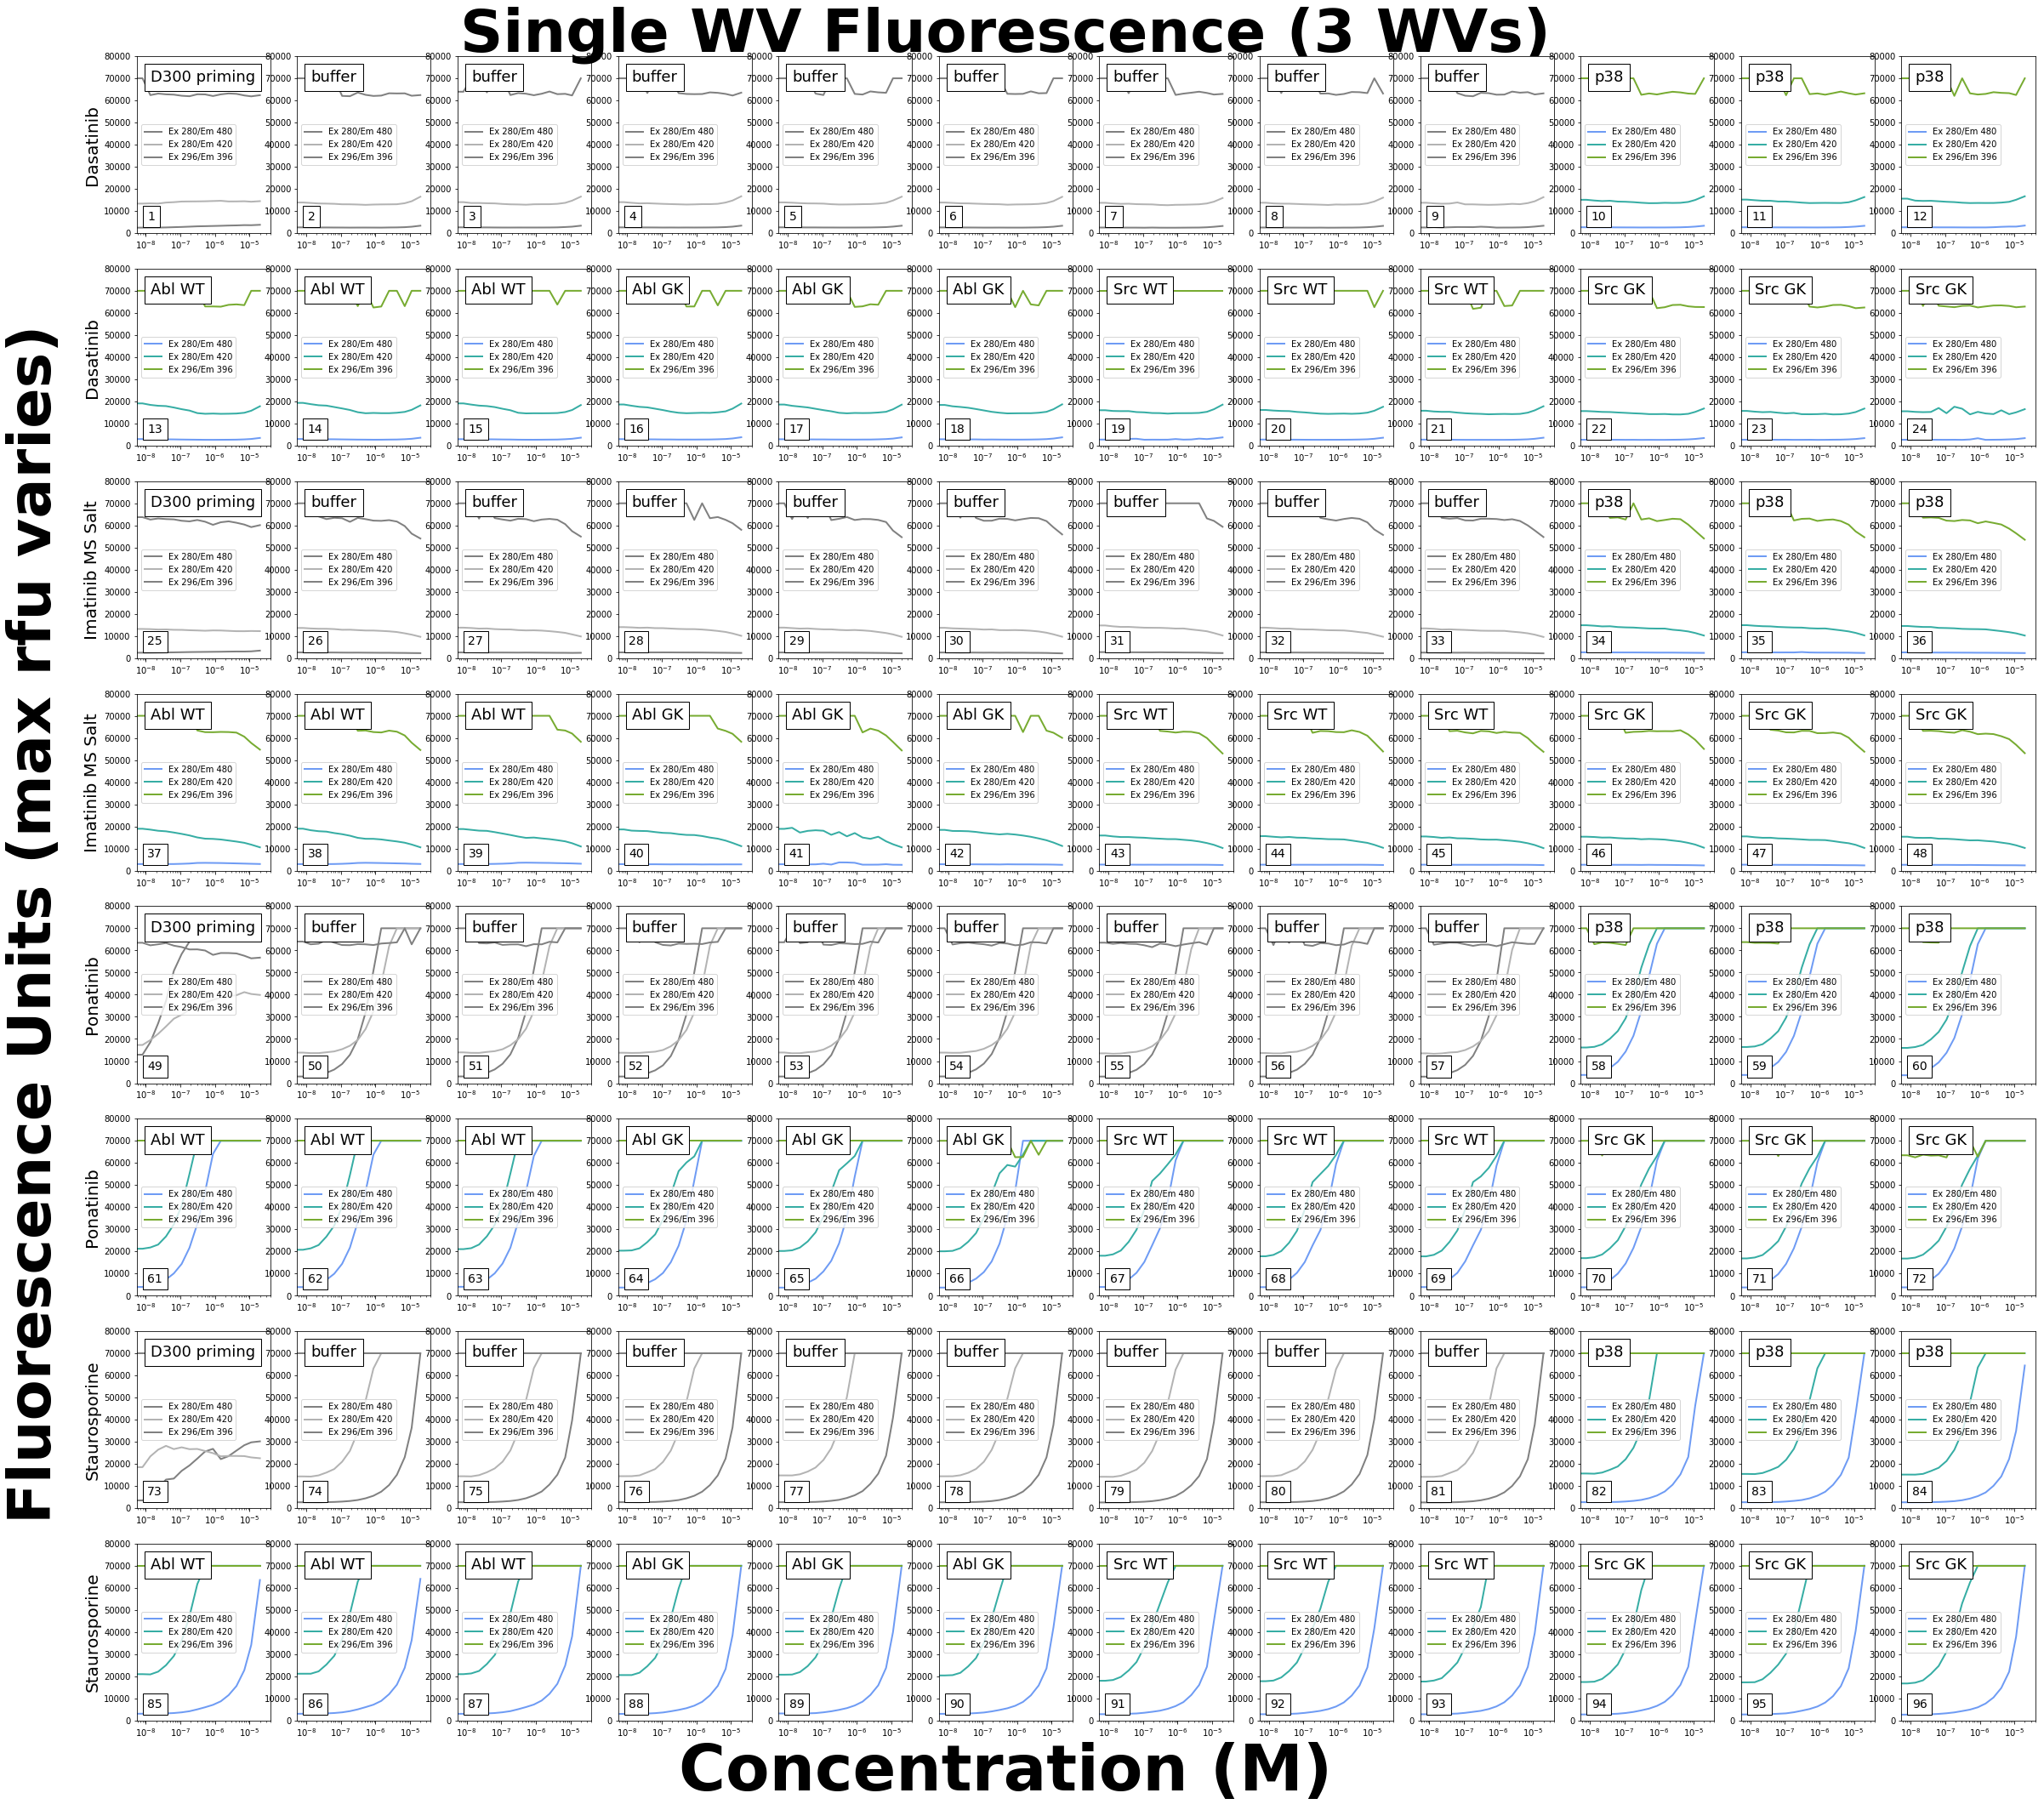

In [10]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

title = 'Single WV Fluorescence (3 WVs)'

current_palette = sns.color_palette("husl", 10)
protein_color_1 = current_palette[7]
protein_color_2 = current_palette[5]
protein_color_3 = current_palette[3]

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color_1
            plt.semilogx(x_values, data_480_20190320[row_index,col_index,:], c=color, linewidth=2, label='Ex 280/Em 480');
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.7'
            else:
                color=protein_color_2
            plt.semilogx(x_values, data_420_20190320[row_index,col_index,:], c=color, linewidth=2, label='Ex 280/Em 420');
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.9'
            else:
                color=protein_color_3
            plt.semilogx(x_values, data_396_20190320[row_index,col_index,:], c=color, linewidth=2, label='Ex 296/Em 396');

        plt.legend(loc='center left')
        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 89:
            plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=70, fontweight='bold')
        if index == 85:
            axis = plt.gca()
            plt.ylabel('Fluorescence Units (max rfu varies)', fontsize=70, fontweight='bold')
            axis.yaxis.set_label_coords(-1.75,4.5)

        plt.ylim(0,80000)
                
        # ligand labels
        if index == 12 or index == 0:
            plt.ylabel('Dasatinib', fontsize=20)
        if index == 24 or index == 36:
            plt.ylabel('Imatinib MS Salt', fontsize=20)
        if index == 48 or index == 60:
            plt.ylabel('Ponatinib', fontsize=20)
        if index == 72 or index == 84:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

fig.savefig('20190320_vary_yax_single_well_3_wv_ligs5-8_overlap_log_y.pdf', bbox_inches='tight', dpi=300)

# Overlay one well of buffer with ponatinib & staurosporine on same plots

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

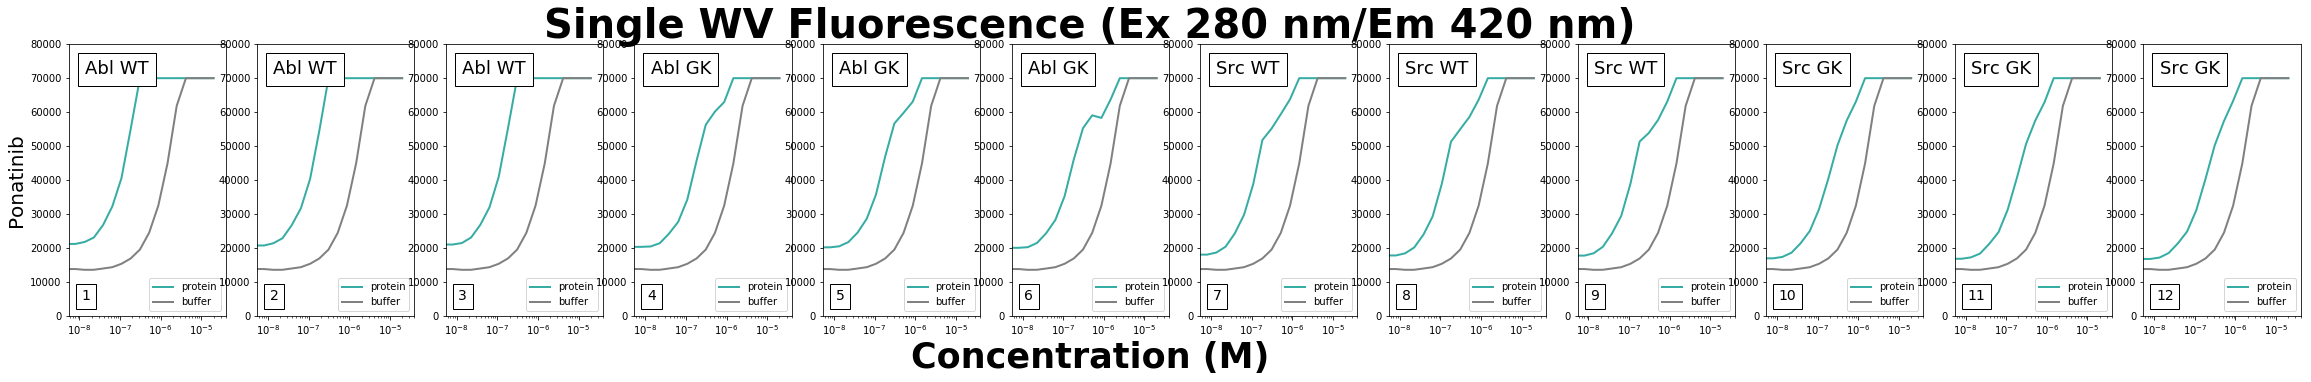

In [11]:
# plot buffer and protein on same plot for ponatinib at Ex 280/Em 420

nrows = 1
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,5])

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[5]

title = 'Single WV Fluorescence (Ex 280 nm/Em 420 nm)'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('F')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_420_20190320[row_index+5,col_index,:], c=color, linewidth=2, label='protein');
            
        plt.legend(loc='lower right')
        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 5:
            plt.xlabel('Concentration (M)', fontsize=35, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=40, fontweight='bold')

        plt.ylim(0,80000)
                
        # ligand labels

        if index == 0:
            plt.ylabel('Ponatinib', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

index = 0
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('E')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_420_20190320[4,1,:], c='0.5', linewidth=2, label='buffer');
            plt.legend(loc='lower right')
        index += 1
            
fig.savefig('20190320_ponatinib_420_log_y.pdf', bbox_inches='tight', dpi=300)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

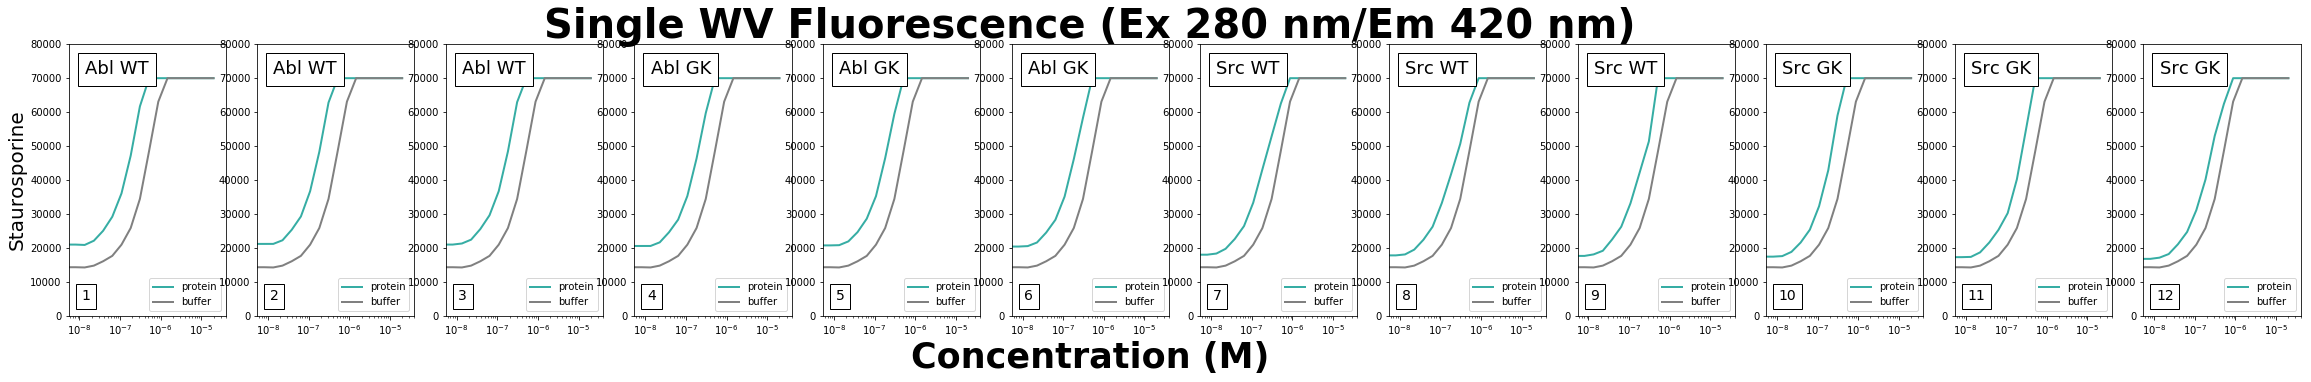

In [12]:
# plot buffer and protein on same plot for staurosporine at Ex 280/Em 420

nrows = 1
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,5])

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[5]

title = 'Single WV Fluorescence (Ex 280 nm/Em 420 nm)'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('H')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_420_20190320[row_index+7,col_index,:], c=color, linewidth=2, label='protein');
            
        plt.legend(loc='lower right')
        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 5:
            plt.xlabel('Concentration (M)', fontsize=35, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=40, fontweight='bold')

        plt.ylim(0,80000)
                
        # ligand labels

        if index == 0:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

index = 0
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('G')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_420_20190320[6,1,:], c='0.5', linewidth=2, label='buffer');
            plt.legend(loc='lower right')
        index += 1
            
fig.savefig('20190320_stauro_420_log_y.pdf', bbox_inches='tight', dpi=300)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

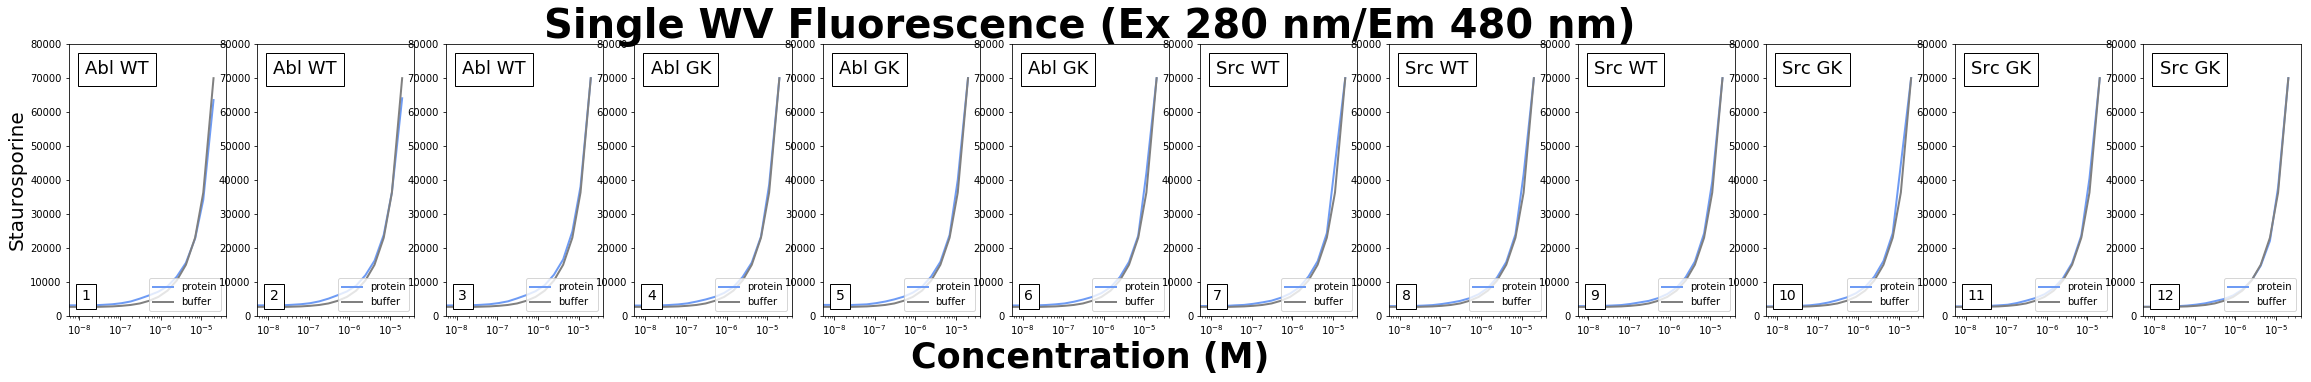

In [13]:
# plot buffer and protein on same plot for staurosporine at Ex 280/Em 480

nrows = 1
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,5])

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[7]

title = 'Single WV Fluorescence (Ex 280 nm/Em 480 nm)'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('H')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_480_20190320[row_index+7,col_index,:], c=color, linewidth=2, label='protein');
            
        plt.legend(loc='lower right')
        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 5:
            plt.xlabel('Concentration (M)', fontsize=35, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=40, fontweight='bold')

        plt.ylim(0,80000)
                
        # ligand labels

        if index == 0:
            plt.ylabel('Staurosporine', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

index = 0
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('G')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_480_20190320[6,1,:], c='0.5', linewidth=2, label='buffer');
            plt.legend(loc='lower right')
        index += 1
            
fig.savefig('20190320_stauro_480_log_y.pdf', bbox_inches='tight', dpi=300)

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

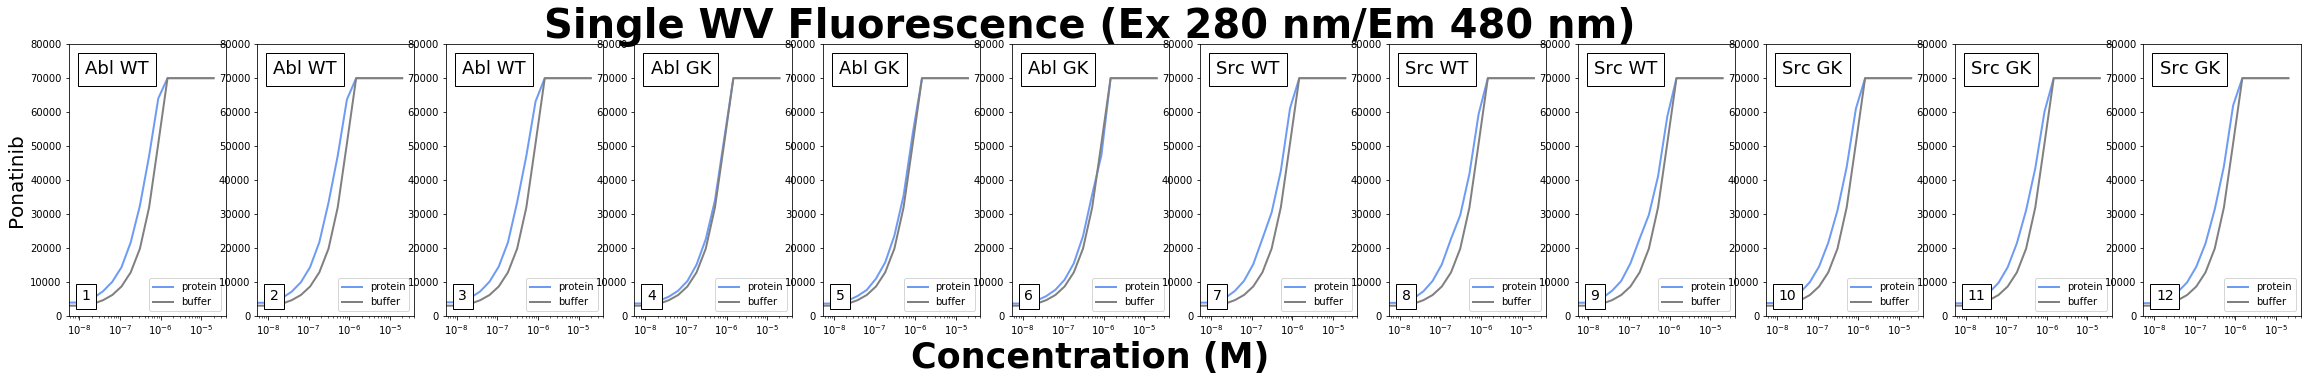

In [14]:
# plot buffer and protein on same plot for ponatinib at Ex 280/Em 480

nrows = 1
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,5])

current_palette = sns.color_palette("husl", 10)
protein_color = current_palette[7]

title = 'Single WV Fluorescence (Ex 280 nm/Em 480 nm)'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('F')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming']:
                 color='0.5'
            else:
                color=protein_color
            plt.semilogx(x_values, data_480_20190320[row_index+5,col_index,:], c=color, linewidth=2, label='protein');
            
        plt.legend(loc='lower right')
        plt.xlim(0,4e-5)
        plt.tick_params(axis='both', which='major', labelsize=10)

        # label subplots with contents of wells and index # 
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc='upper left', prop=dict(size=18))
            ax.add_artist(anchored_text)
        if index == 5:
            plt.xlabel('Concentration (M)', fontsize=35, fontweight='bold')
        if index == 5:
            plt.title(title, loc='center', fontsize=40, fontweight='bold')

        plt.ylim(0,80000)
                
        # ligand labels

        if index == 0:
            plt.ylabel('Ponatinib', fontsize=20)

        index += 1
        anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
        ax.add_artist(anchored_text2)

index = 0
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('G')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            plt.semilogx(x_values, data_480_20190320[4,1,:], c='0.5', linewidth=2, label='buffer');
            plt.legend(loc='lower right')
        index += 1
            
fig.savefig('20190320_ponatinib_480_log_y.pdf', bbox_inches='tight', dpi=300)